In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
#use this method when data is missing at random
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [12]:
x = df.drop(columns=['Survived'])
y = df['Survived']


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [18]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [19]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [20]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].mean()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].mean()

In [26]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [27]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean,Fare_mean
385,18.0,73.5000,0,18.000000,18.000000,73.5000,73.5000,73.5000
410,NaN,7.8958,0,29.498846,29.498846,7.8958,7.8958,7.8958
768,NaN,24.1500,1,29.498846,29.498846,24.1500,24.1500,24.1500
544,50.0,106.4250,1,50.000000,50.000000,106.4250,106.4250,106.4250
601,NaN,7.8958,0,29.498846,29.498846,7.8958,7.8958,7.8958


In [28]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  168.8519336687225
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2621.2323749512393
Fare Variance after mean imputation:  2621.2323749512393


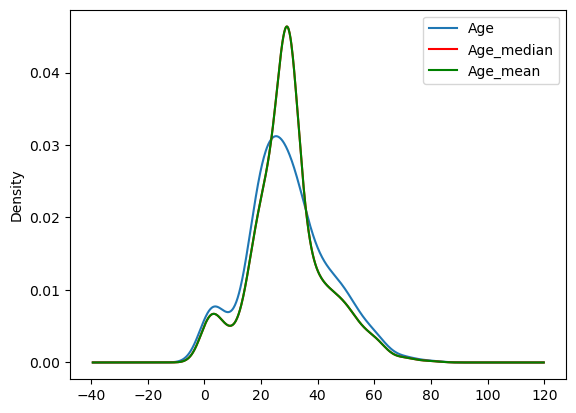

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

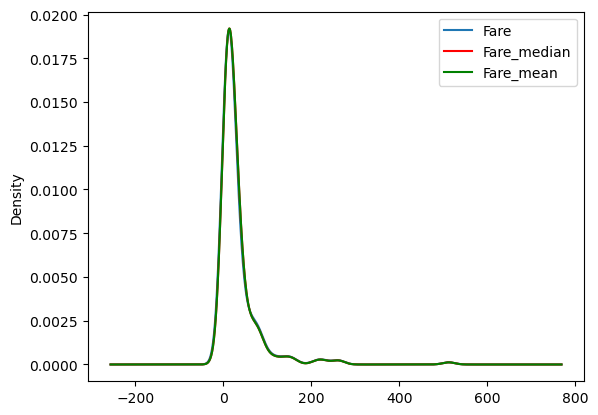

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,71.193767,71.193767
Fare,75.481375,2761.031435,18.599163,60.224654,60.224654,2761.031435,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.616299,17.657433,17.657433,17.657433
Age_median,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,57.175304,57.175304
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,57.175304,57.175304
Fare_median,71.193767,2761.031435,17.657433,57.175304,57.175304,2621.232375,2621.232375,2621.232375
fare_mean,71.193767,2761.031435,17.657433,57.175304,57.175304,2621.232375,2621.232375,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,57.175304,57.175304,2621.232375,2621.232375,2621.232375


In [36]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.088944,0.088944
Fare,0.091482,1.000000,0.207193,0.088151,0.088151,1.000000,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.256883,0.204981,0.204981,0.204981
Age_median,1.000000,0.088151,-0.256883,1.000000,1.000000,0.085941,0.085941,0.085941
Age_mean,1.000000,0.088151,-0.256883,1.000000,1.000000,0.085941,0.085941,0.085941
Fare_median,0.088944,1.000000,0.204981,0.085941,0.085941,1.000000,1.000000,1.000000
fare_mean,0.088944,1.000000,0.204981,0.085941,0.085941,1.000000,1.000000,1.000000
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.085941,1.000000,1.000000,1.000000


<Axes: >

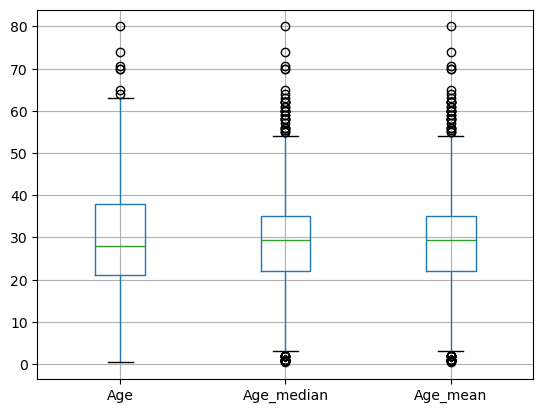

In [37]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

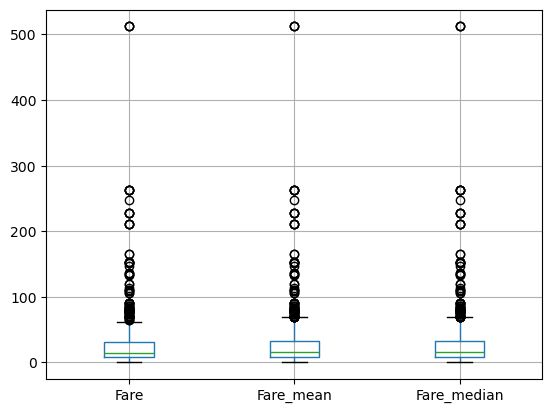

In [39]:
x_train[['Fare','Fare_mean','Fare_median']].boxplot()

# using sklearn

In [40]:
x_train,x_test,y_train,x_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [41]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [45]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [46]:
trf.fit(x_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [47]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [48]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Define imputers
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

# Define transformer
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

# Fit transformer on training data (must be DataFrame)
trf.fit(X_train)

# Transform (ensure X_train, X_test are still DataFrames)
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

print(X_train)


[[ 40.      27.7208   0.    ]
 [  4.      16.7      2.    ]
 [ 47.       9.       0.    ]
 ...
 [ 71.      49.5042   0.    ]
 [ 28.75   221.7792   0.    ]
 [ 28.75    25.925    0.    ]]
